In [ ]:
%load_ext autoreload
%autoreload 2
import os

import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import sys
sys.path.append('..')
import transects
from ganwrapper import Generator
from tqdm import tqdm

import util
from config import *
G = Generator(image_size=512)

In [5]:
# load latents across reg vals
im_num = 0
regs = [10000, 1e-1, 0]
ims = []
latents = []
im_orig = mpimg.imread(oj(DIR_IMS, f'{im_num + 1:05}.jpg'))
for reg in regs:
    folder = f'gen/generated_images_{reg}'
    im_fname = oj(DIR_PROCESSED, folder, f'{im_num + 1:05}.png')
    ims.append(mpimg.imread(im_fname))
    latents.append(np.load(oj(DIR_PROCESSED, folder, f'{im_num + 1:05}.npy')))

# now let's manipulate the images

In [6]:
kwargs = {
    # change these
    'save_dir': 'results/tnew',
    'latents': latents,
    
    # probably not these
    'G': G,
    'model_dir': DIR_LINEAR_DIRECTIONS, #"transects/data/latent-models/",
    'orth': True,
    'randomize_seeds': False,
    'return_ims': True
}



# make 1D transects
LIMS = {
    'C': [-1.5, 1.7],
    'H': [-0.5, 0.0],
    'G': [-1.75, 1.75],
    
    # these are not calibrated
    'A': [-2, 2],
    'B': [-2, 2],
    'M': [-2, 2],
    'S': [-2, 2],
    'E': [-2, 2],
    'W': [-2, 2],    
}

## varying reg fig

In [ ]:
ATTRS = 'C'
N_IMS = 7
LIMS['C'] = [-1.4, 1.4]

'''
ATTRS = 'CGAH' # HAGCBMSEW # CHG
N_IMS = 11
'''

transects_1d = {}
for attr in ATTRS:
    ims, attr_df = transects.make_transects(
        attr=attr,
        N_IMS_LIST=[N_IMS],
        LIMS_LIST=LIMS[attr],
        force_project_to_boundary=False,
        **kwargs
    )
    transects_1d[attr] = ims
    
# make CHG transects
'''
ims, attr_df = transects.make_transects(
    **kwargs
)
'''

(1, 21, 512, 512, 3)


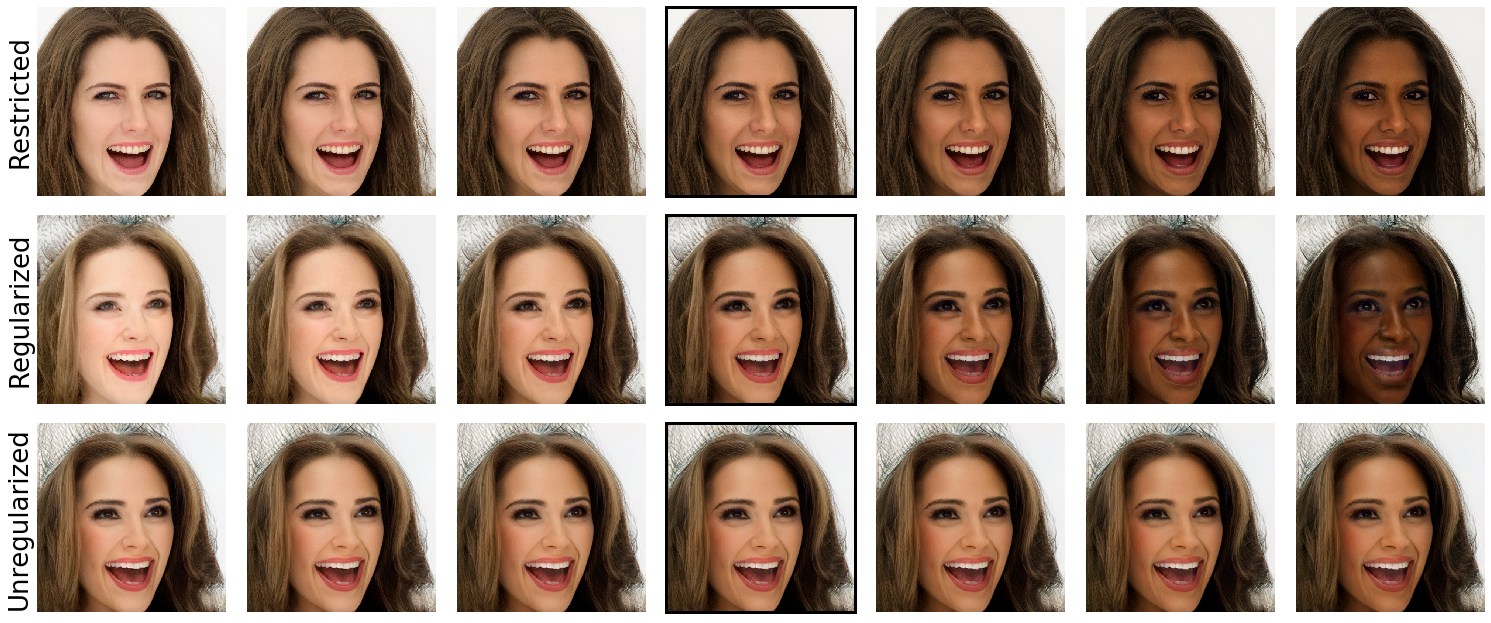

In [37]:
def visualize_individual_latent(transects_1d):
    '''viz 1-d transects for individual latent
    '''
    ims = np.array([transects_1d[a] for a in ATTRS])
    print(ims.shape)
    ims = ims.reshape((len(ATTRS), N_IMS, *ims.shape[2:]))
    util.plot_grid(ims, ylabs=[ATTR_LABELS[a] for a in ATTRS], fontsize_ylab=40)
    

def visualize_varying_reg(transects_1d):
    '''viz 1-d transect (1 attribute) for latents as reg changes
    '''
    REG_LABS = {
        10000: 'Restricted',
        1e-1: 'Regularized',
        0: 'Unregularized'
    }
    ims = np.array([transects_1d[a] for a in ATTRS])
    print(ims.shape)
    ims = ims.reshape((len(latents), N_IMS, *ims.shape[2:]))
    util.plot_grid(ims, ylabs=[REG_LABS[reg] for reg in regs], emphasize_col=N_IMS//2,
                   fontsize_ylab=26)
    plt.subplots_adjust(hspace=0)

    
# visualize_individual_latent(transects_1d)

# ax = plt.subplot(111, facecolor='white')
# plt.imshow(im_orig)
# plt.ylabel('Original', fontsize=40)
# util.emphasize_box(ax)
# util.savefig('manipulations_orig')

visualize_varying_reg(transects_1d)
util.savefig('manipulations_full')

# project things to be neutral

In [ ]:
# load latents
for im_num in np.arange(10):
    im_orig_fname = oj(DIR_IMS, f'{im_num + 1:05}.jpg')
    im_gen_fname = oj(DIR_GEN, f'{im_num + 1:05}.png')
    latents = [np.load(oj(DIR_GEN, f'{im_num + 1:05}.npy'))]
    im_orig = mpimg.imread(im_orig_fname)
    im_gen = mpimg.imread(im_gen_fname)


    attr = 'C'
    im_neutral, W_neutral = transects.make_transects(
        G=G,
        attr=attr,
        latents=latents,
        force_project_to_boundary=False,
        N_IMS_LIST=[1],
        LIMS_LIST=[0, 0],
        return_project_to_boundary=True,
        orth=True,
    )
    util.plot_row([im_orig, im_gen, im_neutral], annot_list=['orig', 'rec', 'neutral'])

# let's just look at a bunch of reconstructions
(at the best reg)

In [15]:
DIR_ORIG = '../data/celeba-hq/ims/'
DIRS_GEN = '../data_processed/celeba-hq/'

reg = 0.1
IM_NUMS = np.arange(30, 60)

ims_orig = []
ims_rec = []
for IM_NUM in IM_NUMS:
    folder = f'generated_images_{reg}'
    im_fname = oj(DIRS_GEN, folder, f'{IM_NUM:05}.png')
    ims_orig.append(mpimg.imread(oj(DIR_IMS, f'{IM_NUM:05}.jpg')))
    ims_rec.append(mpimg.imread(im_fname))

In [ ]:
util.plot_grid(ims_orig)

In [ ]:
util.plot_grid(ims_rec)

### 